# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import OpenWeather API key
my_api_code_source = open('/Users/Richa/Desktop/config.py') 
openweather_api_key = my_api_code_source.read()

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Import todays date in mm/dd/yyyy format
today = date.today()
today = today.strftime("%m/%d/%Y")

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [55]:
#create url starter
url = "http://api.openweathermap.org/data/2.5/weather?q="

#define variables
city_list_data = []
city_name = []
units = "imperial"
lat = []
long = []
max_temp = []
humid = []
clouds = []
wind_speed = []
country = []
date = []
count = 0
record = 0
set_number = 1
error = 0


for city in cities:
    city_data = requests.get(f"{url}{city}&units={units}&appid={openweather_api_key}").json()
    try:
        city_list_data.append(city_data)
        
        # Perform ground work for df while processing records
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        count += 1
        # Create if statement to keep track and add delay
        if record >= 50:
            record = 1
            set_number += 1
            time.sleep(1)
        else:
            record += 1
        
        #Print processing status
        print(f'Processing Record {record} of Set {set_number} | {city}')

    except KeyError:
        print("KeyError")
        error +=1

#Keep data clean and add end statement with counts found
print("-------------------")
print("Processing complete")
print(f"Successfully processed {count} cities")
print(f"Faied to process {error} cities")

Processing Record 1 of Set 1 | wyndham
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | nikolskoye
KeyError
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | goderich
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | kaoma
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | tevaitoa
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | praia
Processing Record 16 of Set 1 | jamestown
KeyError
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | cockburn town
Processing Record 19 of Set 1 | katsuura
KeyError
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | faanui
Processing Record 23 of Set 1 | leningradskiy
Processing Record 24 of Set

KeyError
Processing Record 49 of Set 4 | valparaiso
Processing Record 50 of Set 4 | itaueira
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | tilichiki
Processing Record 4 of Set 5 | ugoofaaru
Processing Record 5 of Set 5 | pak phanang
Processing Record 6 of Set 5 | tainan
Processing Record 7 of Set 5 | moron
Processing Record 8 of Set 5 | miri
Processing Record 9 of Set 5 | notse
Processing Record 10 of Set 5 | nuuk
Processing Record 11 of Set 5 | kasongo
Processing Record 12 of Set 5 | karratha
Processing Record 13 of Set 5 | nichinan
Processing Record 14 of Set 5 | chaihe
Processing Record 15 of Set 5 | odweyne
Processing Record 16 of Set 5 | zaigrayevo
Processing Record 17 of Set 5 | mount gambier
Processing Record 18 of Set 5 | sorong
Processing Record 19 of Set 5 | santa luzia
Processing Record 20 of Set 5 | peniche
KeyError
Processing Record 21 of Set 5 | jibuti
KeyError
Processing Record 22 of Set 5 | chokurdakh
Pro

Processing Record 46 of Set 8 | coquimbo
Processing Record 47 of Set 8 | molteno
Processing Record 48 of Set 8 | sar-e pul
Processing Record 49 of Set 8 | natalio
Processing Record 50 of Set 8 | arinos
Processing Record 1 of Set 9 | rabak
Processing Record 2 of Set 9 | fairview
Processing Record 3 of Set 9 | lucenec
Processing Record 4 of Set 9 | shingu
Processing Record 5 of Set 9 | lae
Processing Record 6 of Set 9 | marzuq
Processing Record 7 of Set 9 | golden
Processing Record 8 of Set 9 | amga
Processing Record 9 of Set 9 | bud
Processing Record 10 of Set 9 | ahipara
Processing Record 11 of Set 9 | okmulgee
Processing Record 12 of Set 9 | victor harbor
Processing Record 13 of Set 9 | carauari
Processing Record 14 of Set 9 | talnakh
Processing Record 15 of Set 9 | alice springs
Processing Record 16 of Set 9 | vanderhoof
Processing Record 17 of Set 9 | los lunas
KeyError
Processing Record 18 of Set 9 | gua musang
Processing Record 19 of Set 9 | luocheng
KeyError
Processing Record 20 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
#Add lists into dictionary
city_weather_dict = {
    "City": city_name,
    "Latitude": lat,
    "Longitude": long,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date 
}

#Create df from dictionary
city_weather_df = pd.DataFrame(city_weather_dict)

#Export the city data into a .csv
city_weather_df.to_csv('output_data/cities.csv', index=False, header=True)

#Display df
city_weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wyndham,37.70,-77.61,30.99,80,1,3.11,US,1608356146
1,Rikitea,-23.12,-134.97,78.31,76,0,21.32,PF,1608356147
2,Carnarvon,-24.87,113.63,80.60,65,0,23.04,AU,1608356147
3,Dikson,73.51,80.55,-21.46,89,100,5.86,RU,1608356147
4,Pisco,-13.70,-76.22,66.20,88,0,11.41,PE,1608356147


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
city_weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.00000,589.000000,5.890000e+02
mean,19.994295,20.895535,50.962649,74.886248,51.91511,8.033582,1.608356e+09
std,32.822034,90.005952,30.463280,18.901975,38.44653,5.578711,4.876023e+01
min,-54.800000,-175.200000,-47.200000,11.000000,0.00000,0.310000,1.608356e+09
25%,-6.720000,-58.400000,30.200000,66.000000,11.00000,3.940000,1.608356e+09
50%,24.220000,23.680000,61.000000,79.000000,51.00000,6.930000,1.608356e+09
75%,48.330000,104.170000,75.200000,88.000000,90.00000,11.410000,1.608356e+09
max,78.220000,179.320000,102.200000,100.000000,100.00000,41.470000,1.608356e+09


In [23]:
#  Get the indices of cities that have humidity over 100%.

#too_humid = city_weather_df[ city_weather_df['Humidity'] > 100].index
#print(too_humid)

Int64Index([], dtype='int64')


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_weather_df, which we call "clean_city_df".

#clean_city_df = city_weather_df.drop(too_humid)
#clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

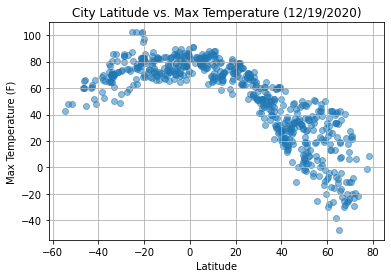

In [70]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Max Temp']

plt.scatter(x_values, y_values, alpha=0.5) 
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

plt.savefig("output_data/LatitudeVsTemperaturePlot.png")

plt.show()


## Latitude vs. Humidity Plot

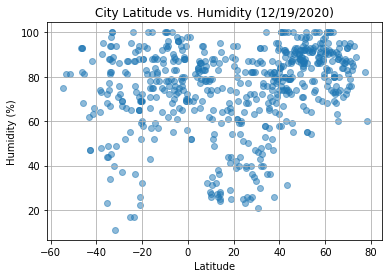

In [74]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Humidity']

plt.scatter(x_values, y_values, alpha=0.5) 
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig("output_data/LatitudeVsHumidityPlot.png")

plt.show()

## Latitude vs. Cloudiness Plot

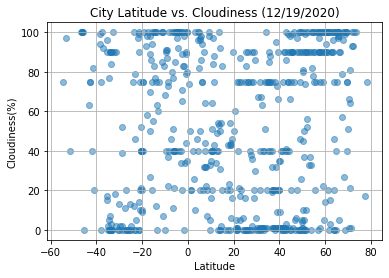

In [72]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Cloudiness']

plt.scatter(x_values, y_values, alpha=0.5) 
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

plt.savefig("output_data/LatitudeVsCloudinessPlot.png")

plt.show()

## Latitude vs. Wind Speed Plot

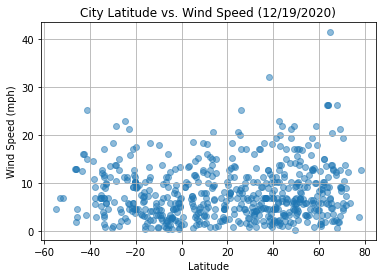

In [73]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Wind Speed']

plt.scatter(x_values, y_values, alpha=0.5) 
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig("output_data/LatitudeVsWindSpeedPlot.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


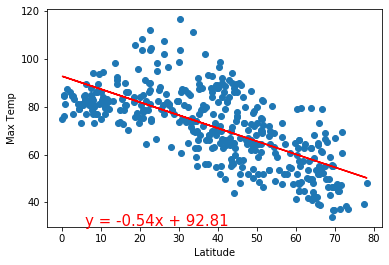

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


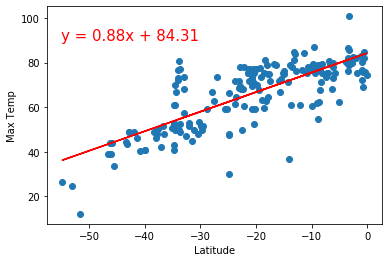

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


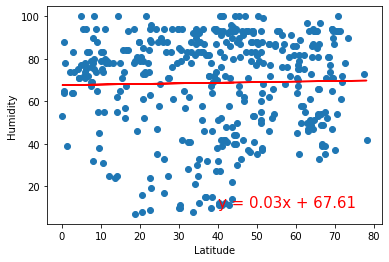

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


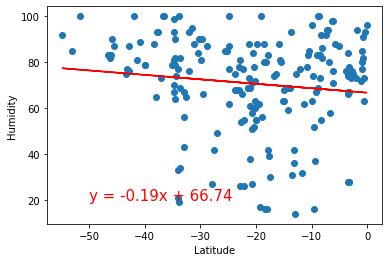

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


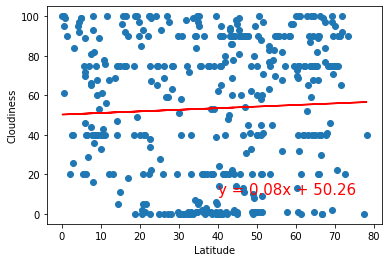

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


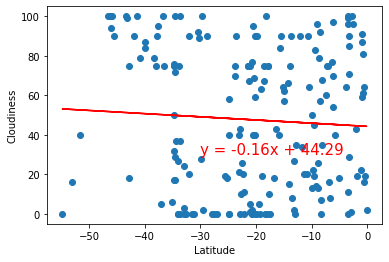

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


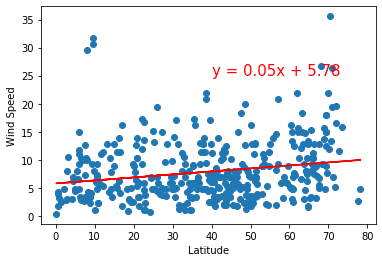

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


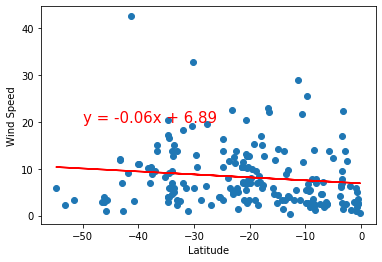